In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the requests library & API Key.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
 # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mackay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | geraldton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | castro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | santa fe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | shiraz
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | chokurdakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | singaraja
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | q

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | albany
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | saint george
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | dubbo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | imbituba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | vaini
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | miri
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | clyde river
-----------------------------
Data Retrieval Complete      
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | gayny
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | ferrol
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | tsihombe
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | colborne
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | ilabaya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | salekhard
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | gamba
-----------------------------
Data Retrieval Complete      
---

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | vostok
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | honningsvag
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | port lincoln
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | coos bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | peruibe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | shymkent
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | tumannyy
City not found. Skipping...
-----------------------------
Data Retrieval Comple

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 5 | kleck
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | meulaboh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | norman wells
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | praia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | namatanai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | egvekinot
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | corn island
-----------------------------
Data Retrieval Complete   

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | mount gambier
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | yialos
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | ornskoldsvik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | airai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | nizhneyansk
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | lazaro cardenas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | locri
----------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | bay roberts
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | shasta lake
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | mapastepec
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | boende
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | korampallam
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | mersing
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | maarianhamina
-----------------------------
Data Retrieval Complete      
----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | maracacume
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | ahipara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | clearwater
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | milledgeville
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | ovre ardal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | muros
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | salalah
-----------------------------
Data Retrieval Complete      
-----------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | jiangyou
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | ilula
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | tigil
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | tautira
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | talas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | guarapari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | tahta
-----------------------------
Data Retrieval Complete      
-----------------------------
Pr

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | podosinovets
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | basco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | lahad datu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | sao filipe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | gap
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | abha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | streator
-----------------------------
Data Retrieval Complete      
--------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 13 | camalobalo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 13 | lahaina
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 13 | yerbogachen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 13 | andapa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 13 | guiyang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 13 | marawi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 13 | socorro
-----------------------------
Data Retrieval Complete      
------------------

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mackay,-21.1500,149.2000,70.05,76,8,4.70,AU,2021-10-08 17:13:19
1,Geraldton,-28.7667,114.6000,52.21,76,0,10.36,AU,2021-10-08 17:13:20
2,Castro,-24.7911,-50.0119,72.12,64,80,2.93,BR,2021-10-08 17:13:20
3,Santa Fe,-31.6333,-60.7000,78.26,23,33,10.31,AR,2021-10-08 17:09:15
4,Shiraz,29.6036,52.5388,74.39,17,0,5.48,IR,2021-10-08 17:13:21
5,Chokurdakh,70.6333,147.9167,4.91,94,65,6.60,RU,2021-10-08 17:13:21
6,Singaraja,-8.1120,115.0882,77.97,81,66,8.41,ID,2021-10-08 17:13:22
7,Qaanaaq,77.4840,-69.3632,23.83,71,95,6.55,GL,2021-10-08 17:13:22
8,Hithadhoo,-0.6000,73.0833,83.21,70,85,9.51,MV,2021-10-08 17:13:22
9,Aykhal,66.0000,111.5000,30.76,90,98,21.30,RU,2021-10-08 17:13:23


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mackay,AU,2021-10-08 17:13:19,-21.1500,149.2000,70.05,76,8,4.70
1,Geraldton,AU,2021-10-08 17:13:20,-28.7667,114.6000,52.21,76,0,10.36
2,Castro,BR,2021-10-08 17:13:20,-24.7911,-50.0119,72.12,64,80,2.93
3,Santa Fe,AR,2021-10-08 17:09:15,-31.6333,-60.7000,78.26,23,33,10.31
4,Shiraz,IR,2021-10-08 17:13:21,29.6036,52.5388,74.39,17,0,5.48
5,Chokurdakh,RU,2021-10-08 17:13:21,70.6333,147.9167,4.91,94,65,6.60
6,Singaraja,ID,2021-10-08 17:13:22,-8.1120,115.0882,77.97,81,66,8.41
7,Qaanaaq,GL,2021-10-08 17:13:22,77.4840,-69.3632,23.83,71,95,6.55
8,Hithadhoo,MV,2021-10-08 17:13:22,-0.6000,73.0833,83.21,70,85,9.51
9,Aykhal,RU,2021-10-08 17:13:23,66.0000,111.5000,30.76,90,98,21.30


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/08/21'

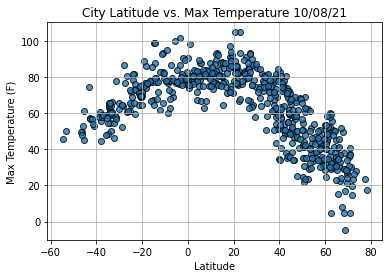

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

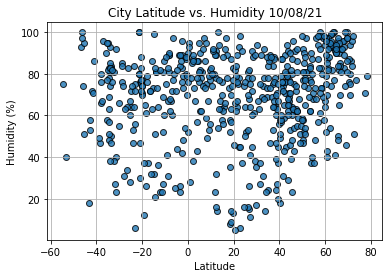

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

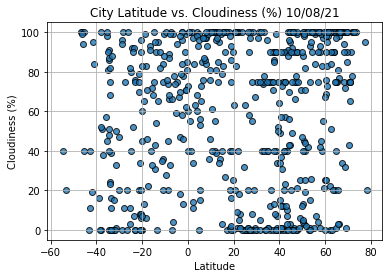

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

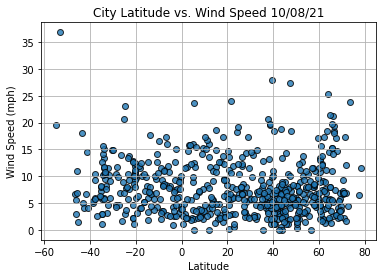

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-10-08 17:13:24
Lat                         -54.8
Lng                         -68.3
Max Temp                    46.02
Humidity                       75
Cloudiness                     40
Wind Speed                  19.57
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Shiraz,IR,2021-10-08 17:13:21,29.6036,52.5388,74.39,17,0,5.48
5,Chokurdakh,RU,2021-10-08 17:13:21,70.6333,147.9167,4.91,94,65,6.60
7,Qaanaaq,GL,2021-10-08 17:13:22,77.4840,-69.3632,23.83,71,95,6.55
9,Aykhal,RU,2021-10-08 17:13:23,66.0000,111.5000,30.76,90,98,21.30
10,Barrow,US,2021-10-08 17:13:23,71.2906,-156.7887,30.22,86,90,17.27


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

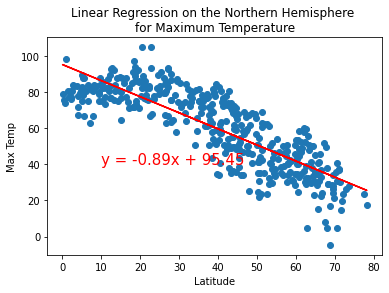

In [68]:
# Linear regression on the Northern Hemisphere  Maximum Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for Maximum Temperature', 'Max Temp',(10,40))

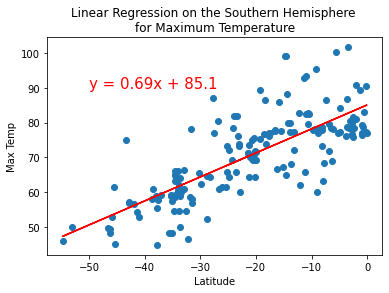

In [66]:
# Linear regression on the Southern Hemisphere  Maximum Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for Maximum Temperature', 'Max Temp',(-50,90))

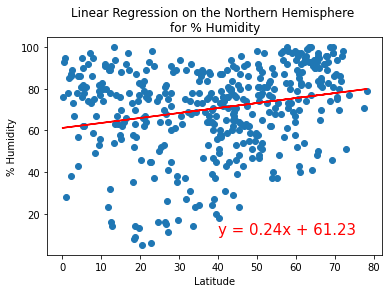

In [67]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for % Humidity', '% Humidity',(40,10))

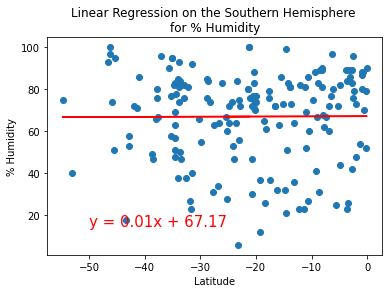

In [65]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for % Humidity', '% Humidity',(-50,15))

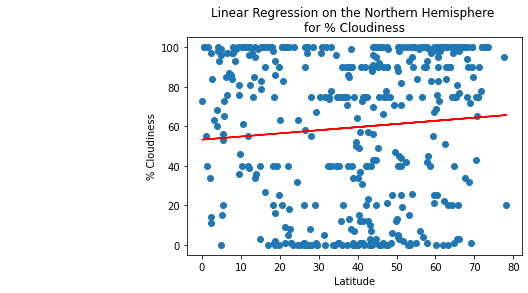

In [64]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for % Cloudiness', '% Cloudiness',(-50,60))

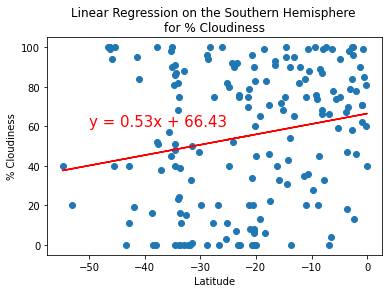

In [63]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for % Cloudiness', '% Cloudiness',(-50,60))

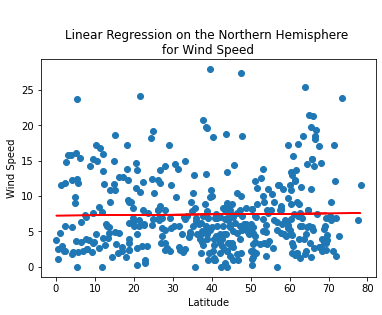

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for Wind Speed', 'Wind Speed',(40,35))

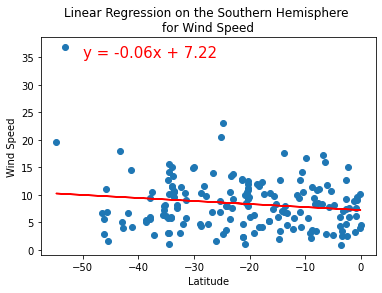

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for Wind Speed', 'Wind Speed',(-50,35))